In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
data = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
data.head()

C:\Users\Julian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
exclude = ['X', 'Y', 'INCDTTM', 'SEVERITYCODE', 'OBJECTID',
           'INCKEY', 'COLDETKEY', 'INTKEY', 'REPORTNO', 'STATUS',
           'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
           'INCDATE', 'INCDTTM', 'SDOT_COLCODE', 'SDOTCOLNUM', 'ST_COLCODE',
           'SEGLANEKEY', 'CROSSWALKKEY', 'PERSONCOUNT', 'VEHCOUNT']

dacol = ['Column', 'Value', 'Freq1', 'Freq2', 'Per2', 'Per2T', 'PerT']
da = {'Column':[],'Value':[], 'Freq1':[], 'Freq2':[], 'Per2':[], 'Per2T':[], 'PerT':[]}
daf = pd.DataFrame(da,columns = dacol)

nt = len(data)
n2t = len(data[data['SEVERITYCODE'].isin([2])])

for column in data.columns.values.tolist():
    if column not in exclude:
        for unique in data[column].unique().tolist():
        #df_dark0 = df_sev2[~df['LIGHTCOND'].isin(['Daylight'])]
            n1 = len(data[data[column].isin([unique]) & data['SEVERITYCODE'].isin([1])])
            n2 = len(data[data[column].isin([unique]) & data['SEVERITYCODE'].isin([2])])
            lvl2 = 100*(n2/(n1+n2))
            per2T = 100*n2/n2t
            perT = 100*n2/nt
            daf_len = len(daf)
            daf.loc[daf_len]=[column, unique, n1, n2, lvl2, per2T, perT]

In [4]:
daf.sort_values(by=['Per2T', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #display(daf)
    #display(daf[daf['Column'].str.contains('PERSONCOUNT')])
    display(daf[daf['Column'].str.contains('ST_COLDESC') | daf['Column'].str.contains('SDOT_COLDESC')])

,Column,Value,Freq1,Freq2,Per2,Per2T,PerT
33,SDOT_COLDESC,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",60871.0,24338.0,28.562711,41.826493,12.501991
35,SDOT_COLDESC,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",36551.0,17748.0,32.685685,30.501134,9.116827
115,ST_COLDESC,Entering at angle,21050.0,13624.0,39.291688,23.413762,6.998402
121,ST_COLDESC,From same direction - both going straight - on...,14403.0,11368.0,44.111598,19.536674,5.839536
43,SDOT_COLDESC,MOTOR VEHCILE STRUCK PEDESTRIAN,665.0,5853.0,89.797484,10.058775,3.006580
124,ST_COLDESC,From opposite direction - one left turn - one ...,5693.0,4631.0,44.856645,7.958686,2.378861
129,ST_COLDESC,Vehicle - Pedalcyclist,579.0,4122.0,87.683472,7.083935,2.117397
127,ST_COLDESC,Fixed object,10263.0,3291.0,24.280655,5.655805,1.690527
126,ST_COLDESC,From same direction - both going straight - bo...,4575.0,3054.0,40.031459,5.248505,1.568785
40,SDOT_COLDESC,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",370.0,2734.0,88.079897,4.698563,1.404406


In [5]:
out = ['OBJECTID', 'INCKEY', 'COLDETKEY', 'INTKEY', 'REPORTNO', 
       'STATUS', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 
       'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'INCDATE',
       'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR']
'''
for column in data[out].columns.values.tolist():
    print(column)
    print(data[column].unique())
    print("")

'''

'\nfor column in data[out].columns.values.tolist():\n    print(column)\n    print(data[column].unique())\n    print("")\n\n'

In [6]:
df = data.drop(out, axis = 1)
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,PEDCOUNT,PEDCYLCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE
0,2,-122.323148,47.703140,Intersection,0,0,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,10
1,1,-122.347294,47.647172,Block,0,0,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11
2,1,-122.334540,47.607871,Block,0,0,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,NaN,0,Overcast,Dry,Daylight,NaN,NaN,32
3,1,-122.334803,47.604803,Block,0,0,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,NaN,N,Clear,Dry,Daylight,NaN,NaN,23
4,2,-122.306426,47.545739,Intersection,0,0,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,NaN,0,Raining,Wet,Daylight,NaN,NaN,10


In [7]:
#df.describe(include = 'all')
#df.describe()

In [8]:
df['X'].replace(np.nan, df['X'].mean(), inplace = True)
df['Y'].replace(np.nan, df['Y'].mean(), inplace = True)
df['ADDRTYPE'].replace(np.nan, 'Unknown', inplace = True)
df['JUNCTIONTYPE'].replace(np.nan, 'Unknown', inplace = True)
df['INATTENTIONIND'].replace(np.nan, 0, inplace = True)
df['INATTENTIONIND'].replace('Y', 1, inplace = True)
df['UNDERINFL'].replace(np.nan, 0, inplace = True)
df['UNDERINFL'].replace(['N', '0'], 0, inplace = True)
df['UNDERINFL'].replace(['Y', '1'], 1, inplace = True)
df['WEATHER'].replace(np.nan, 'Unknown', inplace = True)
df['ROADCOND'].replace(np.nan, 'Unknown', inplace = True)
df['LIGHTCOND'].replace(np.nan, 'Unknown', inplace = True)
df['SPEEDING'].replace(np.nan, 0, inplace = True)
df['SPEEDING'].replace('Y', 1, inplace = True)
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['HOURDAY'] = df['INCDTTM'].dt.hour
df['DAYWEEK'] = df['INCDTTM'].dt.dayofweek
df['MONTH'] = df['INCDTTM'].dt.month
df['PEDROWNOTGRNT'].replace(np.nan, 0, inplace = True)
df['PEDROWNOTGRNT'].replace('Y', 1, inplace = True)
#df['HITPARKEDCAR'].replace(['N', '0'], 0, inplace = True)
#df['HITPARKEDCAR'].replace(['Y', '1'], 1, inplace = True)
df['ST_COLCODE'].replace(' ', 31, inplace=True)
df['ST_COLCODE'].replace(np.nan, 31, inplace=True)
df['ST_COLCODE'] = df['ST_COLCODE'].astype('int')
df['PEDNUM'] = df['PEDCOUNT']+df['PEDCYLCOUNT']
df.loc[df['PEDNUM'] > 0, 'PEDNUM'] = 1


nan = df.isnull()
for column in nan.columns.values.tolist():
    print(column)
    print(nan[column].value_counts())
    print("")    
    

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    194673
Name: X, dtype: int64

Y
False    194673
Name: Y, dtype: int64

ADDRTYPE
False    194673
Name: ADDRTYPE, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    194673
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLCODE
False    194673
Name: SDOT_COLCODE, dtype: int64

INATTENTIONIND
False    194673
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    194673
Name: UNDERINFL, dtype: int64

WEATHER
False    194673
Name: WEATHER, dtype: int64

ROADCOND
False    194673
Name: ROADCOND, dtype: int64

LIGHTCOND
False    194673
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
False    194673
Name: PEDROWNOTGRNT, dtype: int64

SPEEDING
False    194673
Name: SPEEDING, dtype: int64

ST_COLCODE
False    194673
Name: ST_COLCODE, dtype: int64

HOURDAY
False    194673
Name: HOURDAY

In [9]:
df.drop(['INCDTTM', 'PEDCYLCOUNT', 'PEDCOUNT'], axis = 1, inplace = True)

In [10]:
for column in df.columns.values.tolist():
    print(column)
    print(df[column].unique())
    print("")

SEVERITYCODE
[2 1]

X
[-122.3231484 -122.3472943 -122.33454   ... -122.3927543 -122.3042172
 -122.3616722]

Y
[47.70314032 47.64717249 47.60787143 ... 47.51527348 47.6695375
 47.55672231]

ADDRTYPE
['Intersection' 'Block' 'Alley' 'Unknown']

JUNCTIONTYPE
['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'Mid-Block (but intersection related)'
 'At Intersection (but not related to intersection)' 'Unknown'
 'Ramp Junction']

SDOT_COLCODE
[11 16 14 51 13 26 28 18 34  0 24 69 12 21 23 29 27 48 15 55 33 56 54 31
 44 32 25 66 36 64 22 58 47 61 35 53 46 68 52]

INATTENTIONIND
[0 1]

UNDERINFL
[0 1]

WEATHER
['Overcast' 'Raining' 'Clear' 'Unknown' 'Other' 'Snowing' 'Fog/Smog/Smoke'
 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt' 'Severe Crosswind'
 'Partly Cloudy']

ROADCOND
['Wet' 'Dry' 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']

LIGHTCOND
['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' '

In [11]:
exclude = ['X', 'Y', 'INCDTTM', 'SEVERITYCODE']

dacol = ['Column', 'Value', 'Freq1', 'Freq2', 'Per2', 'Per2T', 'PerT']
da = {'Column':[],'Value':[],'Freq1':[],'Freq2':[], 'Per2':[], 'Per2T':[], 'PerT':[]}
daf = pd.DataFrame(da,columns = dacol)

nt = len(data)
n2t = len(data[data['SEVERITYCODE'].isin([2])])

for column in df.columns.values.tolist():
    if column not in exclude:
        for unique in df[column].unique().tolist():
        #df_dark0 = df_sev2[~df['LIGHTCOND'].isin(['Daylight'])]
            n1 = len(df[df[column].isin([unique]) & df['SEVERITYCODE'].isin([1])])
            n2 = len(df[df[column].isin([unique]) & df['SEVERITYCODE'].isin([2])])
            lvl2 = 100*(n2/(n1+n2))
            per2T = 100*n2/n2t
            perT = 100*n2/nt
            daf_len = len(daf)
            daf.loc[daf_len]=[column, unique, n1, n2, lvl2, per2T, perT]

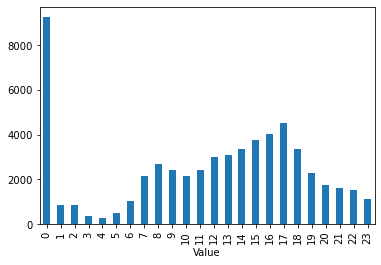

In [12]:
dfh = daf[daf['Column'].str.contains('HOURDAY')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq2']
p.plot(kind = 'bar')

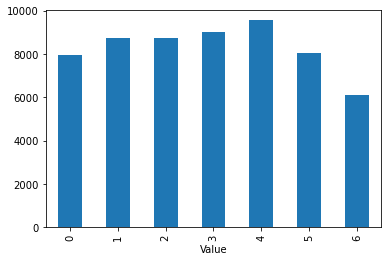

In [13]:
dfh = daf[daf['Column'].str.contains('DAYWEEK')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq2']
p.plot(kind = 'bar')

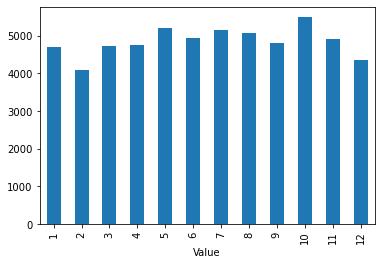

In [14]:
dfh = daf[daf['Column'].str.contains('MONTH')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq2']
p.plot(kind = 'bar')

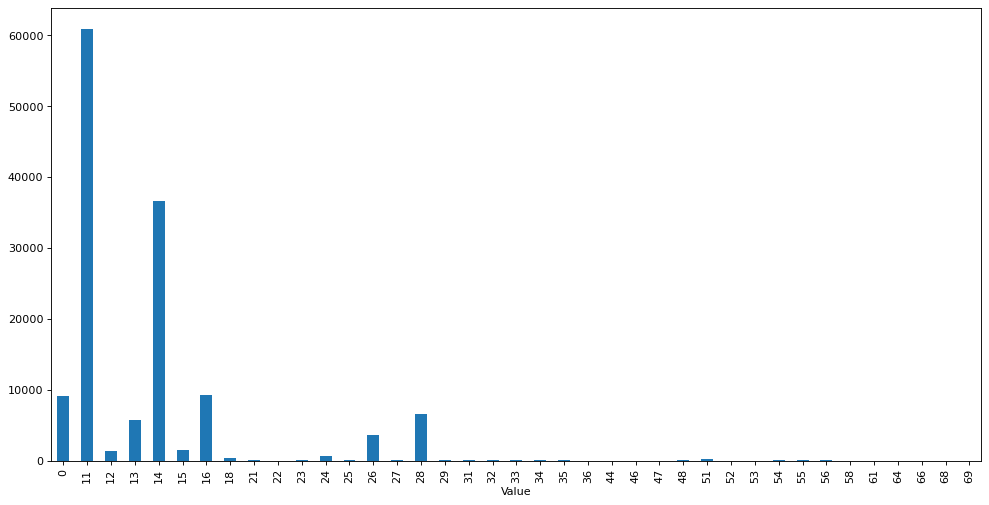

In [15]:
fs = 15
figure(num=None, figsize=(fs, fs*0.5), dpi=80, facecolor='w', edgecolor='k')
dfh = daf[daf['Column'].str.contains('SDOT_COLCODE')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq1']
p.plot(kind = 'bar')

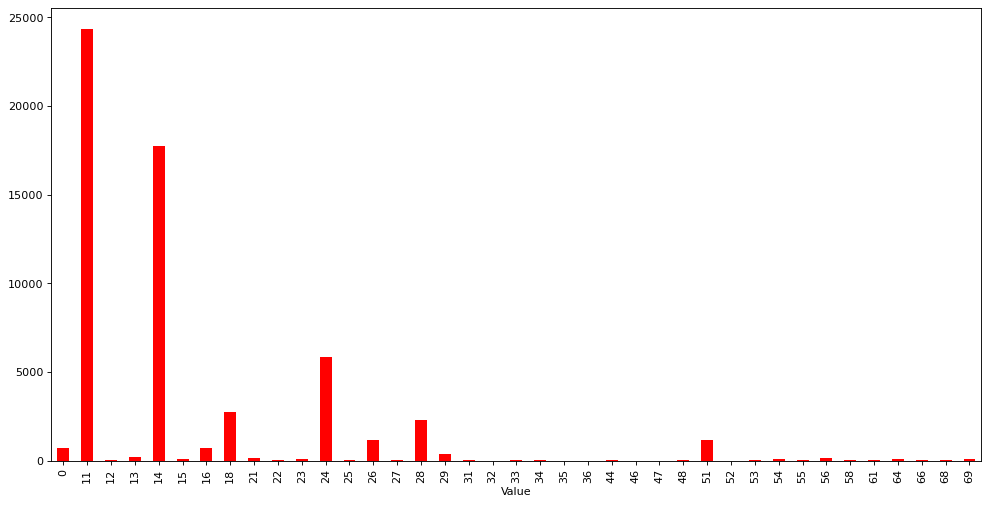

In [16]:
figure(num=None, figsize=(fs, fs*0.5), dpi=80, facecolor='w', edgecolor='k')
dfh = daf[daf['Column'].str.contains('SDOT_COLCODE')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq2']
p.plot(kind = 'bar', color = 'r')

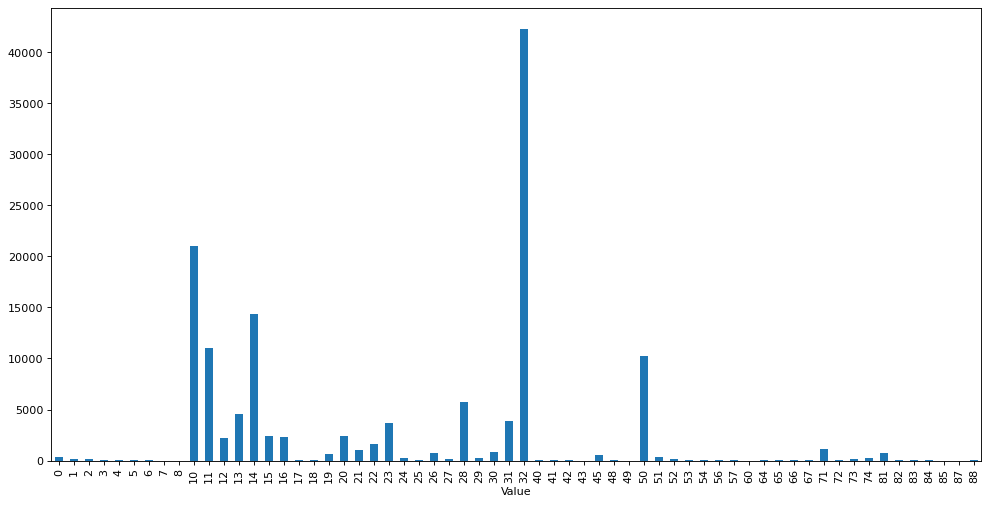

In [17]:
figure(num=None, figsize=(fs, fs*0.5), dpi=80, facecolor='w', edgecolor='k')
dfh = daf[daf['Column'].str.contains('ST_COLCODE')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq1']
p.plot(kind = 'bar')

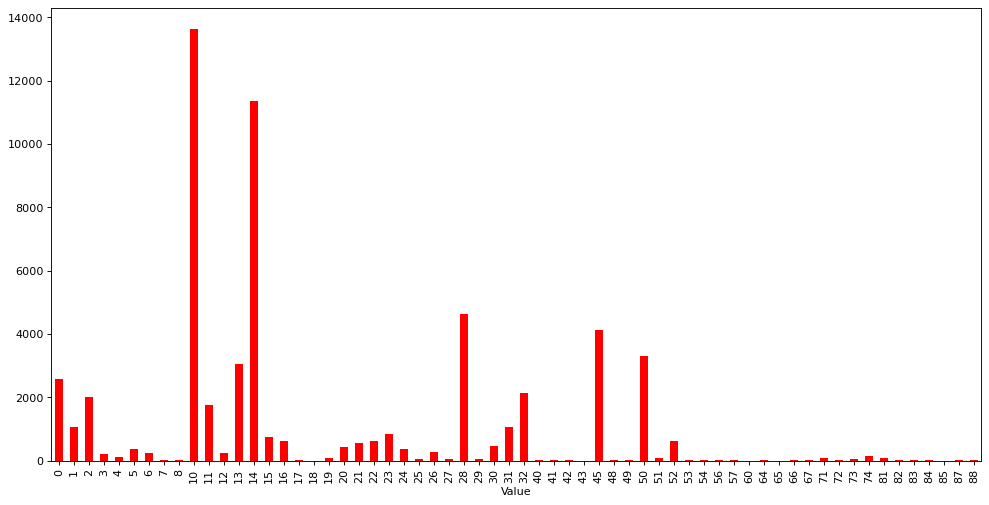

In [18]:
figure(num=None, figsize=(fs, fs*0.5), dpi=80, facecolor='w', edgecolor='k')
dfh = daf[daf['Column'].str.contains('ST_COLCODE')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq2']
p.plot(kind = 'bar', color = 'r')

In [19]:
df_test = df.groupby(['SEVERITYCODE'])['HOURDAY'].value_counts()

In [20]:
df_sev2 = df[df['SEVERITYCODE'] == 2]
df_sev1 = df[df['SEVERITYCODE'] == 1]
print(len(df_sev2),len(df_sev1))

58188 136485


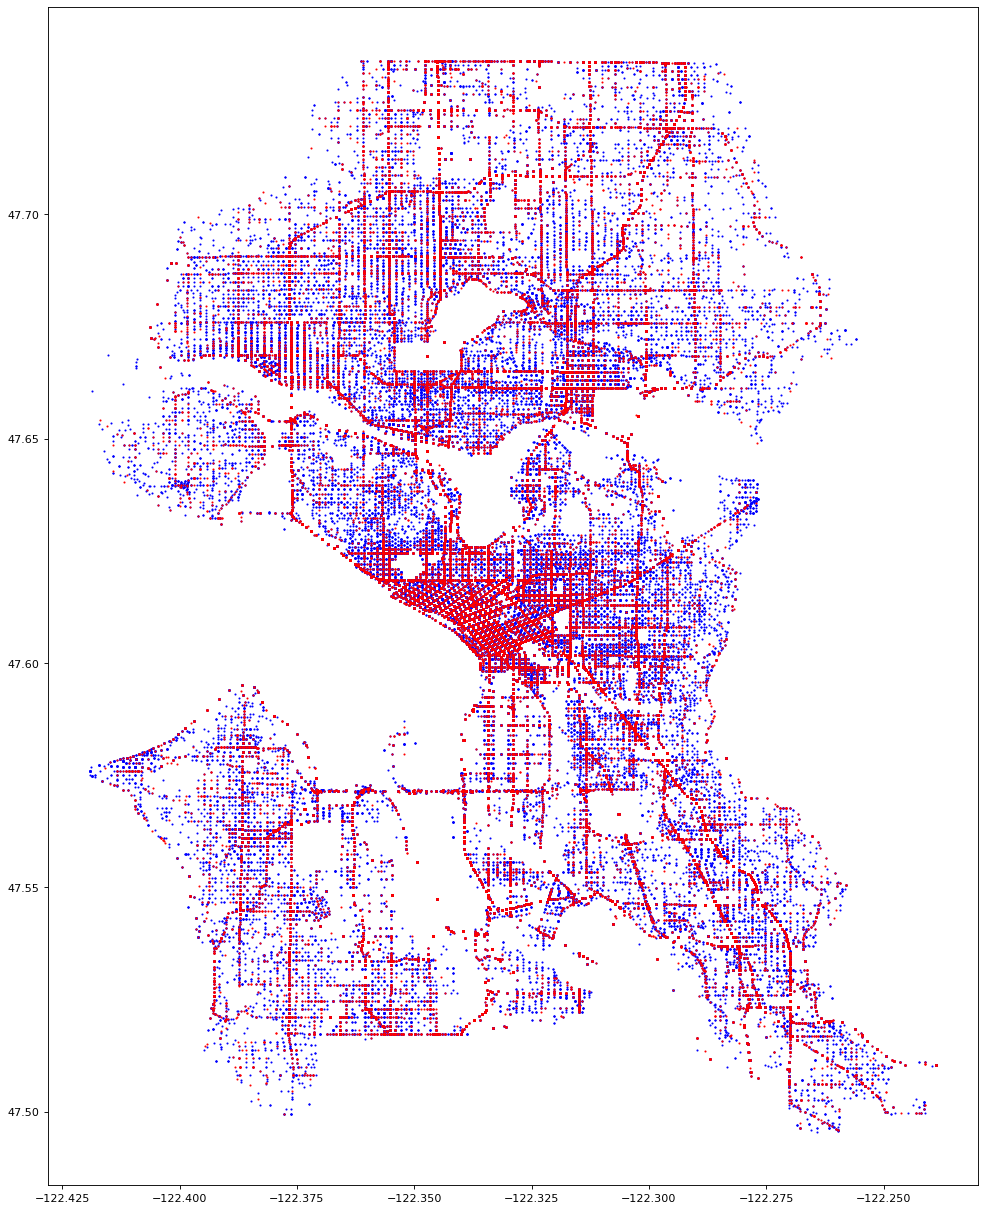

In [21]:
fs = 15
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_sev1['X'], df_sev1['Y'], marker='.', color = 'b', s = 3)
plt.scatter(df_sev2['X'], df_sev2['Y'], marker='.', color = 'r', s = 3)
plt.show()

<ipython-input-23-867739ef4271>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_uin1 = df_sev2[df['UNDERINFL'] == 1]


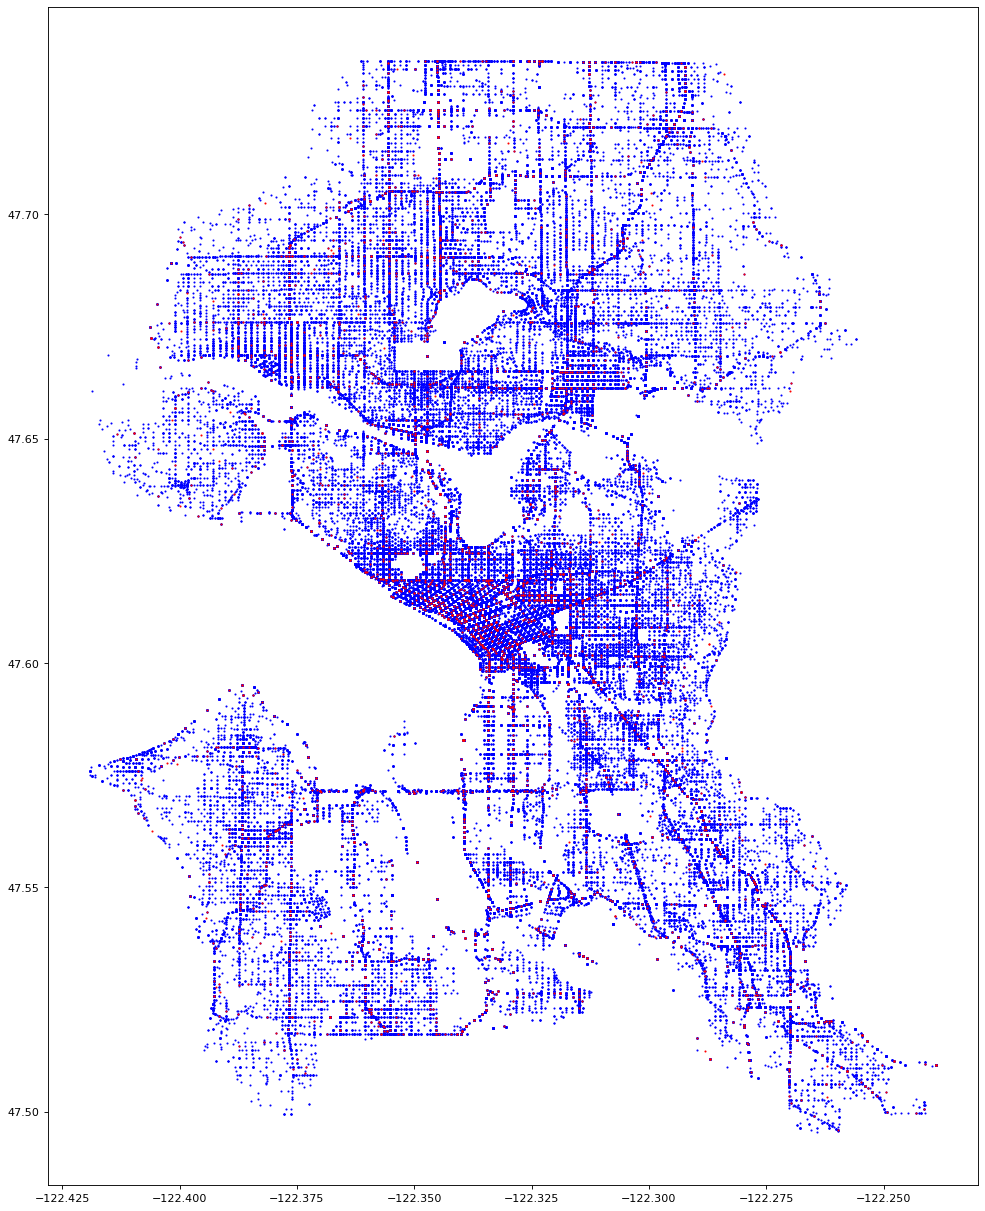

In [23]:
df_uin1 = df_sev2[df['UNDERINFL'] == 1]
df_uin0 = df[df['UNDERINFL'] == 0]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_uin0['X'], df_uin0['Y'], marker='.', color = 'b', s = 3)
plt.scatter(df_uin1['X'], df_uin1['Y'], marker='.', color = 'r', s = 3)
plt.show()

<ipython-input-24-a225cc12c5ab>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iat1 = df_sev2[df['INATTENTIONIND'] == 1]


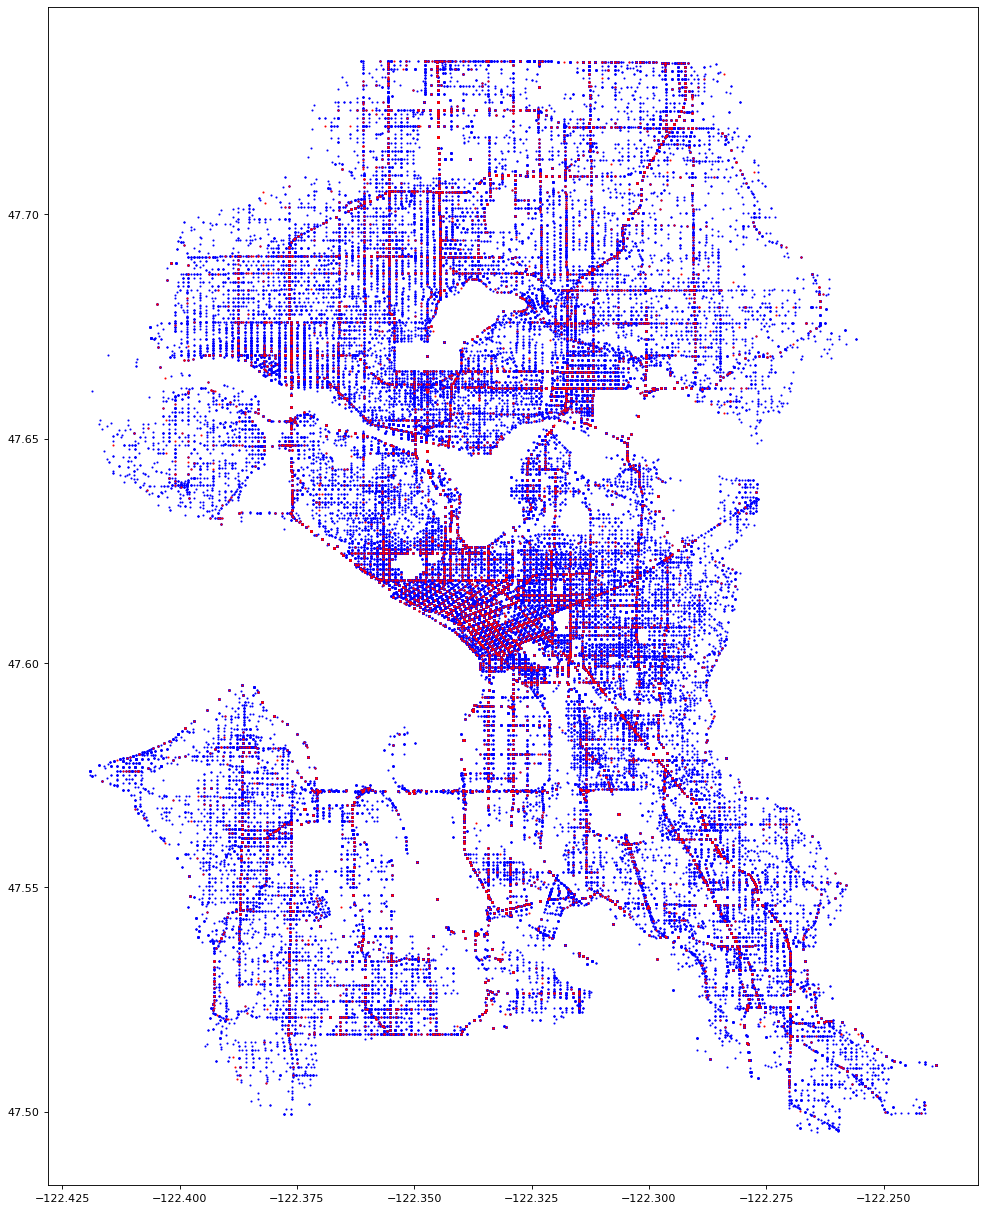

In [24]:
df_iat1 = df_sev2[df['INATTENTIONIND'] == 1]
df_iat0 = df[df['INATTENTIONIND'] == 0]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_iat0['X'], df_iat0['Y'], marker='.', color = 'b', s = 3)
plt.scatter(df_iat1['X'], df_iat1['Y'], marker='.', color = 'r', s = 3)
plt.show()

<ipython-input-25-15a0d99770f0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dark0 = df_sev2[~df['LIGHTCOND'].isin(['Daylight'])]


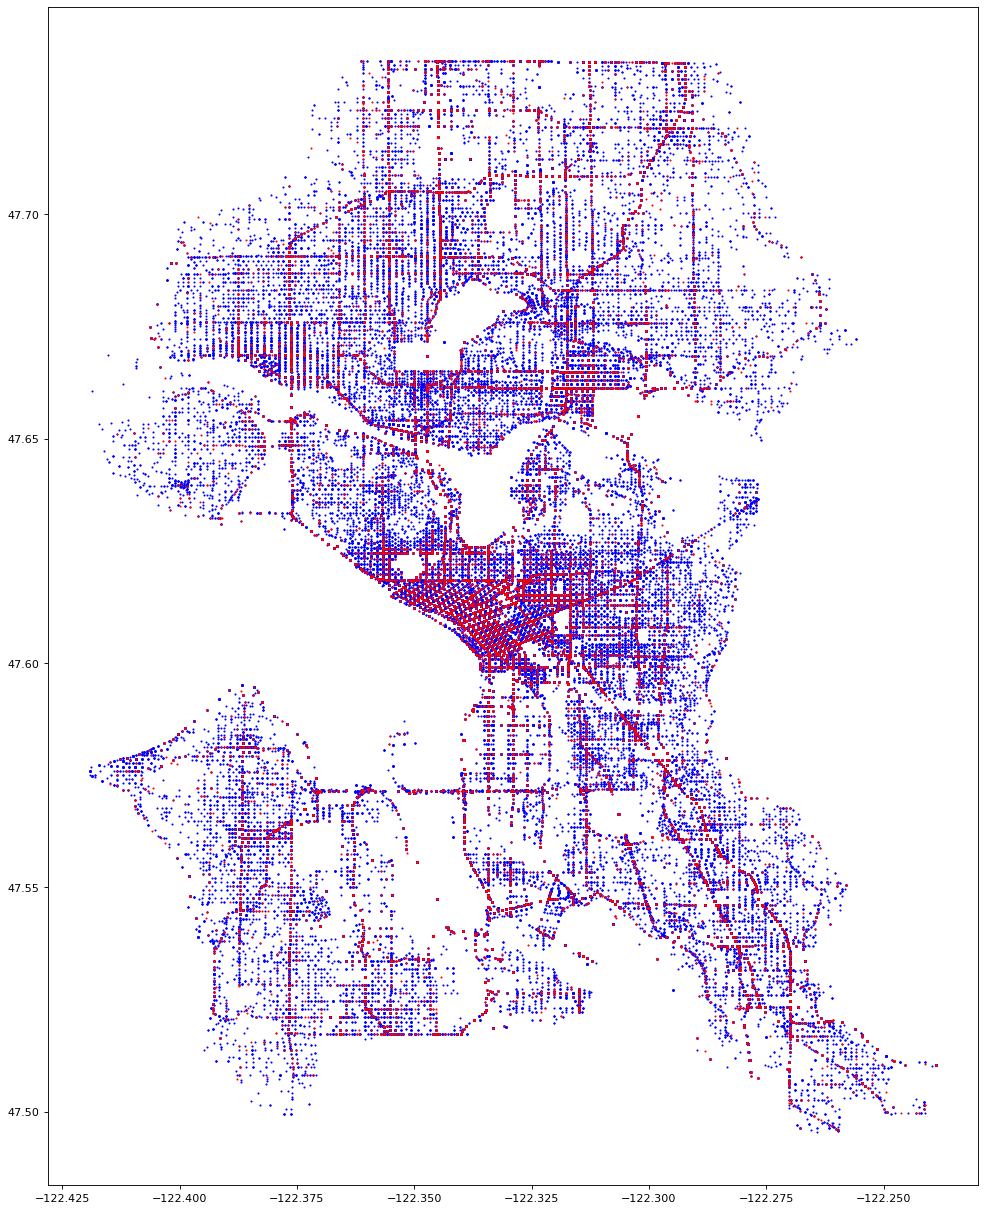

In [25]:
df_dark0 = df_sev2[~df['LIGHTCOND'].isin(['Daylight'])]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_sev1['X'], df_sev1['Y'], marker='.', color = 'b', s = 3)
plt.scatter(df_dark0['X'], df_dark0['Y'], marker='.', color = 'r', s = 3)
plt.show()

<ipython-input-26-a46653a7d0b4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dark = df_sev2[df['JUNCTIONTYPE'].str.contains('Intersection|Mid-Block')]


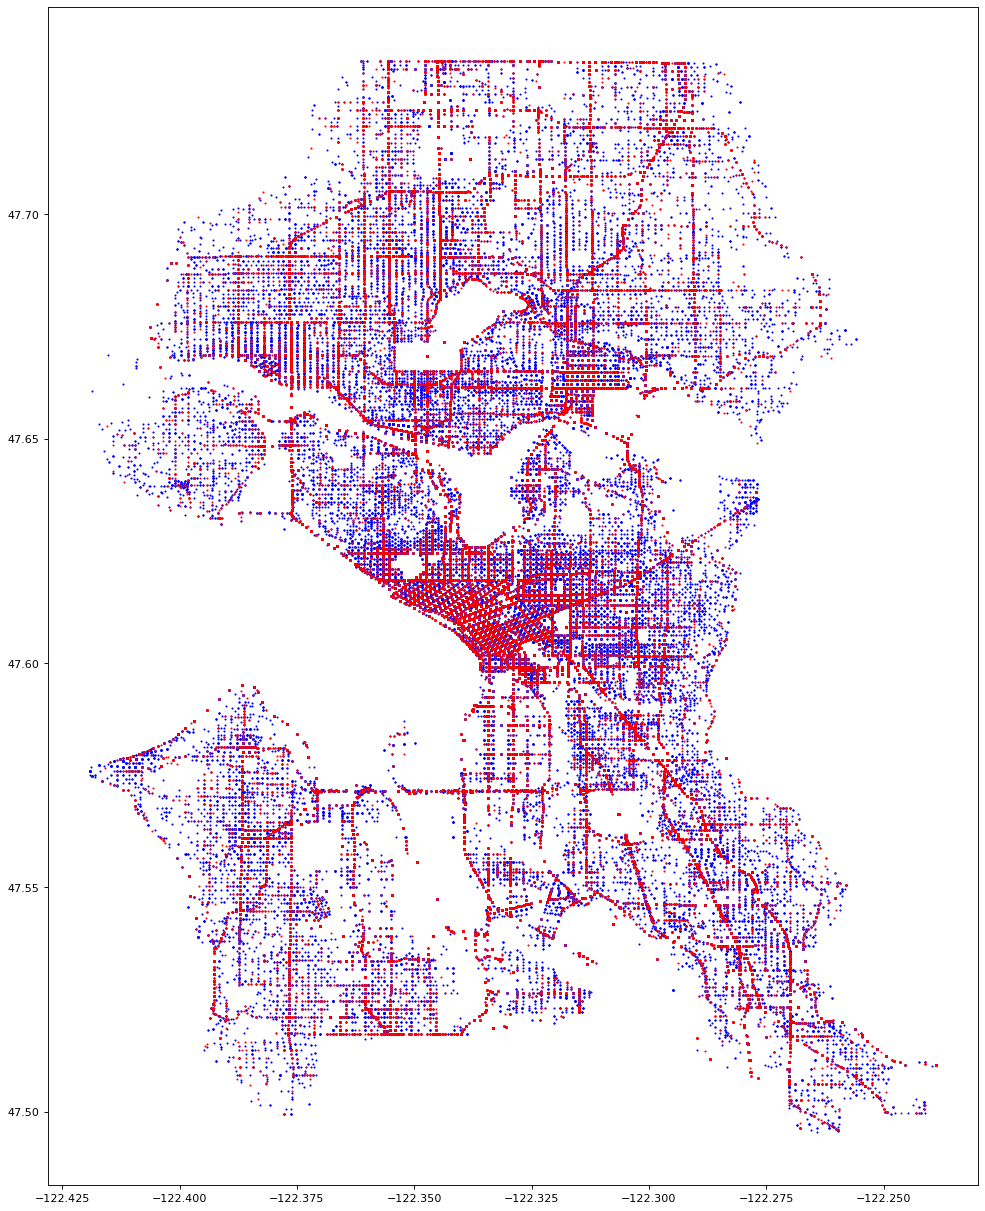

In [26]:
df_dark = df_sev2[df['JUNCTIONTYPE'].str.contains('Intersection|Mid-Block')]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_sev1['X'], df_sev1['Y'], marker='.', color = 'b', s = 3)
plt.scatter(df_dark['X'], df_dark['Y'], marker='.', color = 'r', s = 3)
plt.show()

<ipython-input-27-fb0de0ea1a61>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dark0 = df_sev2[df['DAYWEEK'].isin([0,1,2,3,4,5,6])]


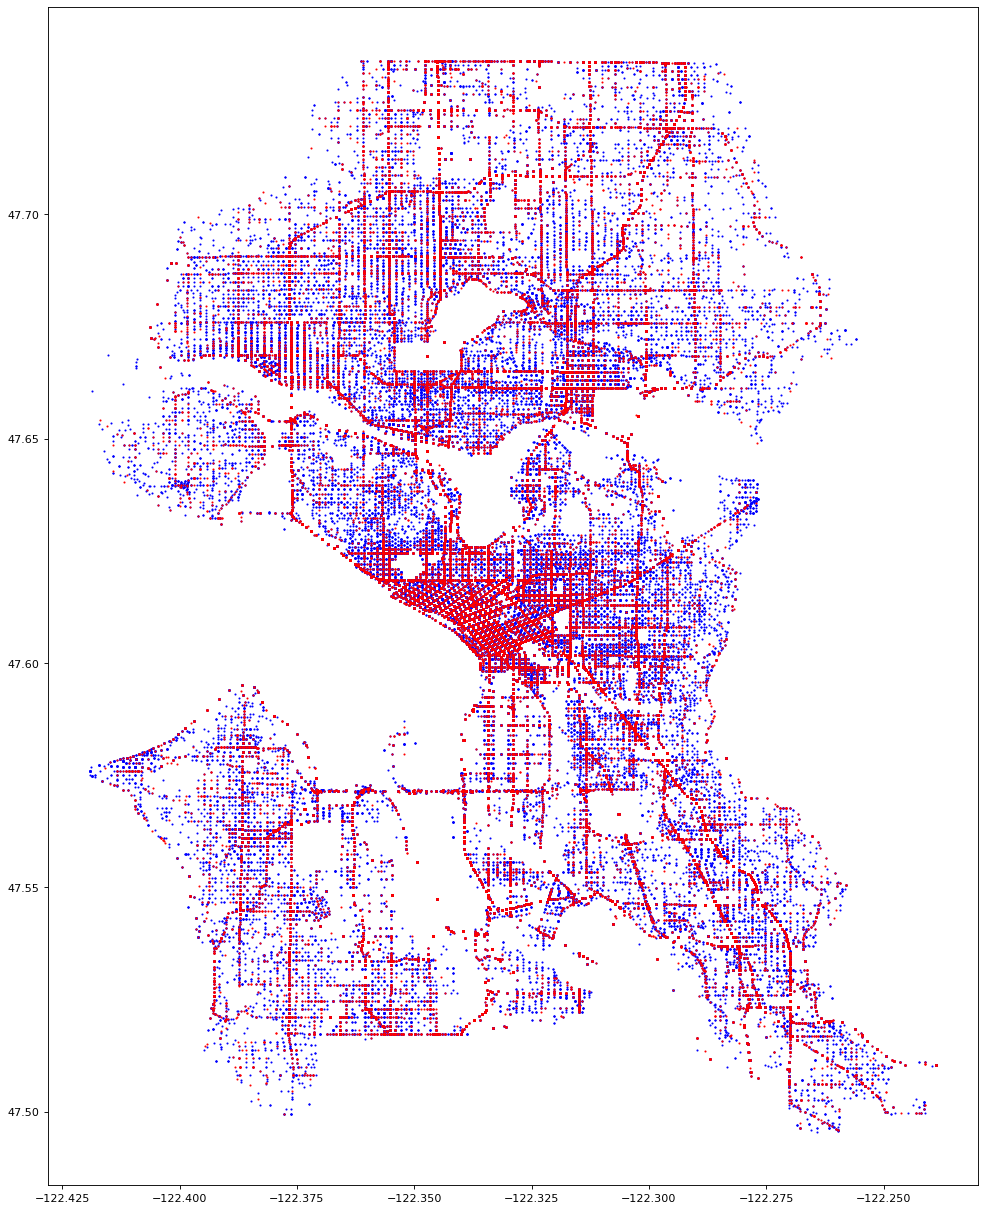

In [27]:
df_dark0 = df_sev2[df['DAYWEEK'].isin([0,1,2,3,4,5,6])]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_sev1['X'], df_sev1['Y'], marker='.', color = 'b', s = 3)
plt.scatter(df_dark0['X'], df_dark0['Y'], marker='.', color = 'r', s = 3)
plt.show()

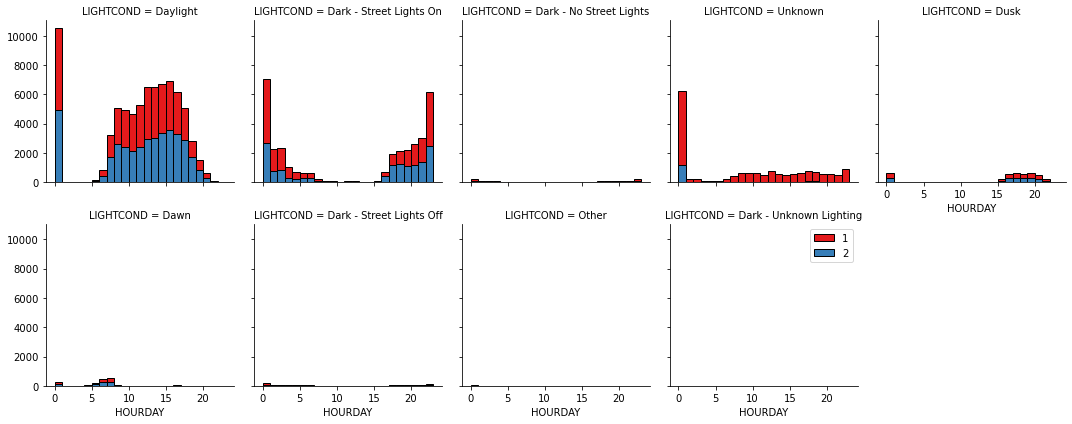

In [28]:
bins=np.linspace(df.HOURDAY.min(), df.HOURDAY.max(), 24)
g = sns.FacetGrid(df, col="LIGHTCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=5)
g.map(plt.hist, 'HOURDAY', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [29]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE', 'HOURDAY', 'DAYWEEK',
       'MONTH', 'PEDNUM'],
      dtype='object')

In [30]:
SeattleXMax = df[['X']].max()
SeattleXMin = df[['X']].min()
SeattleYMax = df[['Y']].max()
SeattleYMin = df[['Y']].min()
SeattleX = np.linspace(SeattleXMin, SeattleXMax, 50)
SeattleY = np.linspace(SeattleYMin, SeattleYMax, 50)
SX, SY = np.meshgrid(SeattleX, SeattleY)
SGrid = pd.DataFrame(np.vstack([SX.ravel(), SY.ravel()]).transpose(), columns = ['X', 'Y'])
len(SGrid)
SGrid.head()

,X,Y
0,-122.419091,47.495573
1,-122.415415,47.495573
2,-122.411738,47.495573
3,-122.408062,47.495573
4,-122.404386,47.495573


In [31]:
def n_prox(coord_df,x,y,epsilon=0.1):
    sorted_df = coord_df.sort_values(by = ['Y', 'X'], ignore_index = True)
    segment = np.linspace(sorted_df['Y'].min(),sorted_df['Y'].max(), 101)    
    k = 0
    for i, value in enumerate(sorted_df['Y']):
        if value >= segment[k] and k < len(segment)-1:
            if value > segment[k]:
                segment[k] = i-1
            else:            
                segment[k] = i
            k += 1

    segment[len(segment)-1]=len(sorted_df)-1
    
    for j, index in enumerate(segment):
        if sorted_df['Y'].iloc[int(index)] > y:
            if j > 0 and j < len(segment):
                j = j-1
            break
    
    if j == len(segment)-1:
        j = len(segment)-2
    
    rangeStart = int(segment[int(j)])
    rangeEnd = int(segment[int(j+1)]) if j < len(segment)-1 else int(len(sorted_df)-1)    
    
    n = 0
    for i in range(rangeStart,rangeEnd):
        if sorted_df.iloc[i,0] < x+2*epsilon and sorted_df.iloc[i,0] > x-2*epsilon and sorted_df.iloc[i,1] < y+3*epsilon and sorted_df.iloc[i,1] > y-3*epsilon:
            distance = ((sorted_df.iloc[i,0]-x)**2 + (sorted_df.iloc[i,1]-y)**2)**(0.5)
            if distance < epsilon:
                n += 1
    return n        

In [32]:
SeattleINATTENTIONIND = df[df['INATTENTIONIND'].isin([1]) & df['SEVERITYCODE'].isin([1])]
Sxy = SeattleINATTENTIONIND[['X', 'Y']]
Sxy = Sxy.reset_index(drop = True)
Sxy
#Sxy = Sxy.append(SGrid,  ignore_index=True)
#figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
#plt.scatter(Sxy['X'], Sxy['Y'], s = 3)

,X,Y
0,-122.318169,47.615837
1,-122.408105,47.576818
2,-122.333271,47.576651
3,-122.314869,47.613625
4,-122.363032,47.548385
...,...,...
19403,-122.356709,47.624583
19404,-122.317228,47.598338
19405,-122.344516,47.689474
19406,-122.335527,47.617434


In [33]:
import datetime
a = datetime.datetime.now()
n = []
for i in range(len(SGrid)):
    n.append(n_prox(Sxy, SGrid['X'].iloc[i], SGrid['Y'].iloc[i], 0.001))
b = datetime.datetime.now()
c = b-a
c.seconds

46

In [34]:
m = list(map(lambda x: True if x > 2 else False,n))
S = SGrid[m]

In [35]:
len(m)

2500

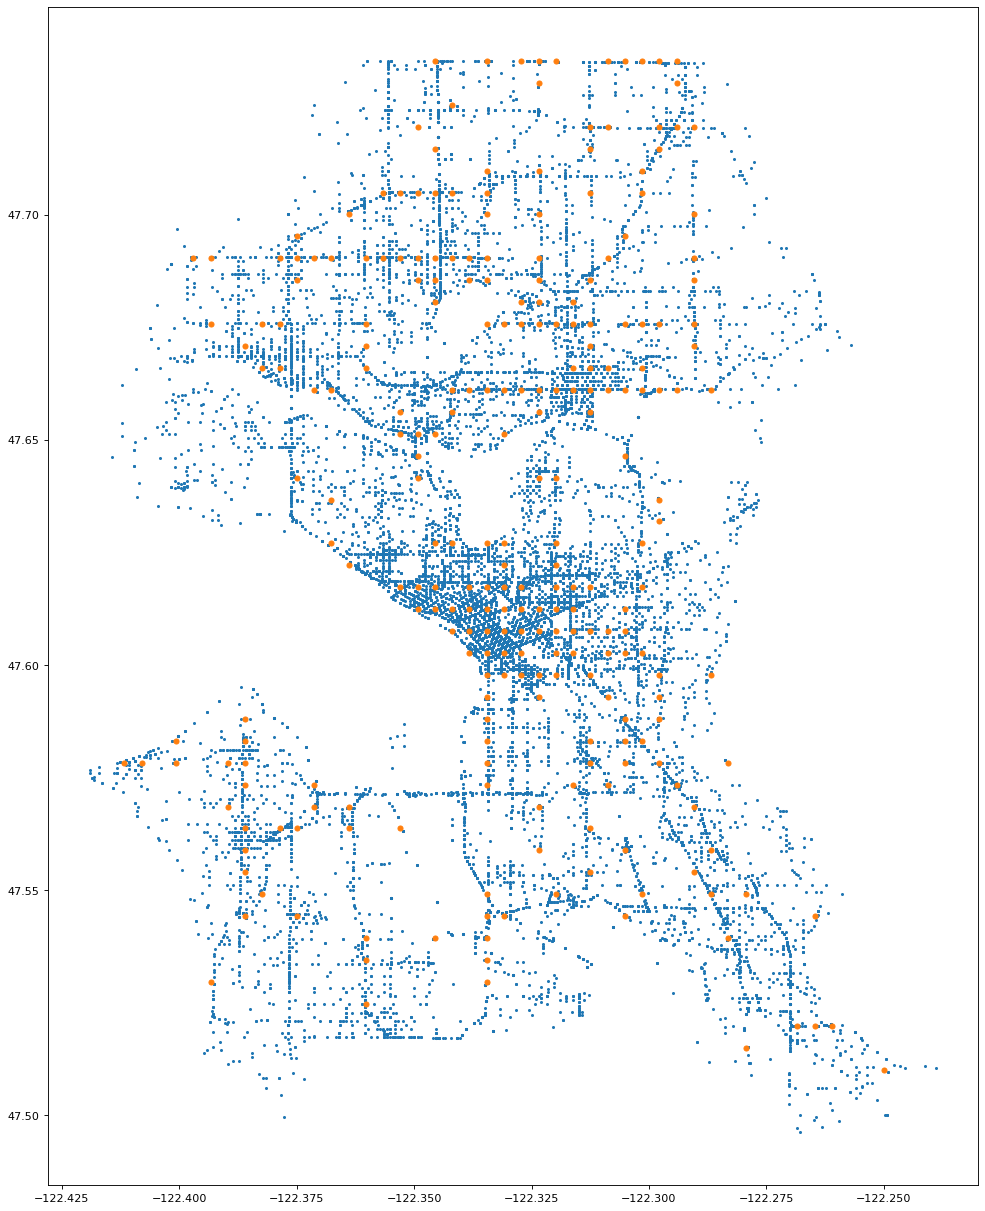

In [36]:
# Plot the points with colors
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(Sxy['X'], Sxy['Y'], s = 3)
plt.scatter(S['X'], S['Y'], s = 20)

In [37]:
daf.sort_values(by=['Per2T', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(daf[daf['Column'].str.contains('ADDRTYPE')])
    #display(daf[daf['Column'].str.contains('ST_COLCODE') | daf['Column'].str.contains('SDOT_COLCODE')])

,Column,Value,Freq1,Freq2,Per2,Per2T,PerT
1,ADDRTYPE,Block,96830.0,30096.0,23.711454,51.722005,15.459771
0,ADDRTYPE,Intersection,37251.0,27819.0,42.752420,47.808827,14.290117
3,ADDRTYPE,Unknown,1735.0,191.0,9.916926,0.328246,0.098113
2,ADDRTYPE,Alley,669.0,82.0,10.918775,0.140923,0.042122


In [38]:
daf.sort_values(by=['Per2T', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(daf[daf['Column'].str.contains('JUNCTIONTYPE')])

,Column,Value,Freq1,Freq2,Per2,Per2T,PerT
4,JUNCTIONTYPE,At Intersection (intersection related),35636.0,27174.0,43.263811,46.700351,13.958792
5,JUNCTIONTYPE,Mid-Block (not related to intersection),70396.0,19404.0,21.608018,33.347082,9.967484
7,JUNCTIONTYPE,Mid-Block (but intersection related),15493.0,7297.0,32.018429,12.540386,3.748337
6,JUNCTIONTYPE,Driveway Junction,7437.0,3234.0,30.306438,5.557847,1.661247
8,JUNCTIONTYPE,At Intersection (but not related to intersection),1475.0,623.0,29.694948,1.070667,0.320024
9,JUNCTIONTYPE,Unknown,5936.0,402.0,6.342695,0.690864,0.206500
10,JUNCTIONTYPE,Ramp Junction,112.0,54.0,32.530120,0.092803,0.027739


In [39]:
df['WEATHER'][~df['WEATHER'].str.contains('Clear|Raining|Overcast')] = 'Other'
daf.sort_values(by=['Per2T', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(daf[daf['Column'].str.contains('WEATHER')])

<ipython-input-39-ee0e1e2d2d8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WEATHER'][~df['WEATHER'].str.contains('Clear|Raining|Overcast')] = 'Other'


,Column,Value,Freq1,Freq2,Per2,Per2T,PerT
56,WEATHER,Clear,75295.0,35840.0,32.249066,61.593456,18.410360
55,WEATHER,Raining,21969.0,11176.0,33.718510,19.206709,5.740909
54,WEATHER,Overcast,18969.0,8745.0,31.554449,15.028872,4.492148
57,WEATHER,Unknown,18272.0,1900.0,9.418997,3.265278,0.975996
60,WEATHER,Fog/Smog/Smoke,382.0,187.0,32.864675,0.321372,0.096059
59,WEATHER,Snowing,736.0,171.0,18.853363,0.293875,0.087840
58,WEATHER,Other,716.0,116.0,13.942308,0.199354,0.059587
61,WEATHER,Sleet/Hail/Freezing Rain,85.0,28.0,24.778761,0.048120,0.014383
62,WEATHER,Blowing Sand/Dirt,41.0,15.0,26.785714,0.025779,0.007705
63,WEATHER,Severe Crosswind,18.0,7.0,28.000000,0.012030,0.003596


In [40]:
df['ROADCOND'][df['ROADCOND'].str.contains('Ice|Snow')] = 'Ice-Snow-Slush'
df['ROADCOND'][~df['ROADCOND'].str.contains('Dry|Wet|Ice')] = 'Other'
daf.sort_values(by=['Per2T', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(daf[daf['Column'].str.contains('ROADCOND')])

<ipython-input-40-94acc8ca2893>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROADCOND'][df['ROADCOND'].str.contains('Ice|Snow')] = 'Ice-Snow-Slush'
<ipython-input-40-94acc8ca2893>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROADCOND'][~df['ROADCOND'].str.contains('Dry|Wet|Ice')] = 'Other'


,Column,Value,Freq1,Freq2,Per2,Per2T,PerT
66,ROADCOND,Dry,84446.0,40064.0,32.177335,68.852684,20.580152
65,ROADCOND,Wet,31719.0,15755.0,33.186586,27.076029,8.093059
67,ROADCOND,Unknown,18281.0,1809.0,9.004480,3.108888,0.929251
69,ROADCOND,Ice,936.0,273.0,22.580645,0.469169,0.140235
68,ROADCOND,Snow/Slush,837.0,167.0,16.633466,0.287001,0.085785
70,ROADCOND,Other,89.0,43.0,32.575758,0.073898,0.022088
72,ROADCOND,Standing Water,85.0,30.0,26.086957,0.051557,0.015410
73,ROADCOND,Oil,40.0,24.0,37.500000,0.041246,0.012328
71,ROADCOND,Sand/Mud/Dirt,52.0,23.0,30.666667,0.039527,0.011815


In [41]:
df['LIGHTCOND'][df['LIGHTCOND'].str.contains('Dark')] = 'Dark'
df['LIGHTCOND'][df['LIGHTCOND'].str.contains('Dusk|Dawn')] = 'Dusk-Dawn'
df['LIGHTCOND'].replace('Unknown','Other', inplace = True)
daf.sort_values(by=['Per2T', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(daf[daf['Column'].str.contains('LIGHTCOND')])

<ipython-input-41-4e1d33d33384>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LIGHTCOND'][df['LIGHTCOND'].str.contains('Dark')] = 'Dark'
<ipython-input-41-4e1d33d33384>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LIGHTCOND'][df['LIGHTCOND'].str.contains('Dusk|Dawn')] = 'Dusk-Dawn'


,Column,Value,Freq1,Freq2,Per2,Per2T,PerT
74,LIGHTCOND,Daylight,77593.0,38544.0,33.188390,66.240462,19.799356
75,LIGHTCOND,Dark - Street Lights On,34032.0,14475.0,29.841054,24.876263,7.435546
78,LIGHTCOND,Dusk,3958.0,1944.0,32.937987,3.340895,0.998598
77,LIGHTCOND,Unknown,16948.0,1695.0,9.091884,2.912972,0.870691
79,LIGHTCOND,Dawn,1678.0,824.0,32.933653,1.416100,0.423274
76,LIGHTCOND,Dark - No Street Lights,1203.0,334.0,21.730644,0.574002,0.171570
80,LIGHTCOND,Dark - Street Lights Off,883.0,316.0,26.355296,0.543067,0.162323
81,LIGHTCOND,Other,183.0,52.0,22.127660,0.089366,0.026711
82,LIGHTCOND,Dark - Unknown Lighting,7.0,4.0,36.363636,0.006874,0.002055


In [42]:
exclude = ['X', 'Y', 'INCDTTM', 'SEVERITYCODE']

dacol = ['Column', 'Value', 'Freq1', 'Freq2', 'Per2', 'Per2T', 'PerT']
da = {'Column':[],'Value':[],'Freq1':[],'Freq2':[], 'Per2':[], 'Per2T':[], 'PerT':[]}
daf = pd.DataFrame(da,columns = dacol)

nt = len(data)
n2t = len(data[data['SEVERITYCODE'].isin([2])])

for column in df.columns.values.tolist():
    if column not in exclude:
        for unique in df[column].unique().tolist():
        #df_dark0 = df_sev2[~df['LIGHTCOND'].isin(['Daylight'])]
            n1 = len(df[df[column].isin([unique]) & df['SEVERITYCODE'].isin([1])])
            n2 = len(df[df[column].isin([unique]) & df['SEVERITYCODE'].isin([2])])
            lvl2 = 100*(n2/(n1+n2))
            per2T = 100*n2/n2t
            perT = 100*n2/nt
            daf_len = len(daf)
            daf.loc[daf_len]=[column, unique, n1, n2, lvl2, per2T, perT]

In [43]:
daf.sort_values(by=['Per2T', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(daf[daf['Column'].str.contains('PEDNUM|PEDROWNOTGRNT')])

,Column,Value,Freq1,Freq2,Per2,Per2T,PerT
66,PEDROWNOTGRNT,0,136025.0,53981.0,28.410155,92.769987,27.729064
175,PEDNUM,0,135111.0,47232.0,25.902831,81.171376,24.262224
176,PEDNUM,1,1374.0,10956.0,88.856448,18.828624,5.627899
67,PEDROWNOTGRNT,1,460.0,4207.0,90.143561,7.230013,2.161060


In [44]:
df['SEVERITYCODE'].replace([2,1],[1,0], inplace = True)
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HOURDAY,DAYWEEK,MONTH,PEDNUM
0,1,-122.323148,47.703140,Intersection,At Intersection (intersection related),11,0,0,Overcast,Wet,Daylight,0,0,10,14,2,3,0
1,0,-122.347294,47.647172,Block,Mid-Block (not related to intersection),16,0,0,Raining,Wet,Dark,0,0,11,18,2,12,0
2,0,-122.334540,47.607871,Block,Mid-Block (not related to intersection),14,0,0,Overcast,Dry,Daylight,0,0,32,10,3,11,0
3,0,-122.334803,47.604803,Block,Mid-Block (not related to intersection),11,0,0,Clear,Dry,Daylight,0,0,23,9,4,3,0
4,1,-122.306426,47.545739,Intersection,At Intersection (intersection related),11,0,0,Raining,Wet,Daylight,0,0,10,8,2,1,0


In [45]:
df['HOURDAY'] = df['HOURDAY']/df['HOURDAY'].max()
df['DAYWEEK'] = df['DAYWEEK']/df['DAYWEEK'].max()
df['MONTH'] = df['MONTH']/df['MONTH'].max()

In [46]:
X = df[['X', 'Y', 'ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'HOURDAY', 'DAYWEEK', 'MONTH', 'PEDNUM']]
y = df[['SEVERITYCODE']]

In [47]:
X.head()

,X,Y,ADDRTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HOURDAY,DAYWEEK,MONTH,PEDNUM
0,-122.323148,47.703140,Intersection,At Intersection (intersection related),0,0,Overcast,Wet,Daylight,0,0,0.608696,0.333333,0.250000,0
1,-122.347294,47.647172,Block,Mid-Block (not related to intersection),0,0,Raining,Wet,Dark,0,0,0.782609,0.333333,1.000000,0
2,-122.334540,47.607871,Block,Mid-Block (not related to intersection),0,0,Overcast,Dry,Daylight,0,0,0.434783,0.500000,0.916667,0
3,-122.334803,47.604803,Block,Mid-Block (not related to intersection),0,0,Clear,Dry,Daylight,0,0,0.391304,0.666667,0.250000,0
4,-122.306426,47.545739,Intersection,At Intersection (intersection related),0,0,Raining,Wet,Daylight,0,0,0.347826,0.333333,0.083333,0


In [48]:
dummies = ['ADDRTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']
X = pd.concat([X,pd.get_dummies(df[dummies])], axis = 1)
X.drop(dummies, axis = 1, inplace = True)
#junc_df = pd.get_dummies(df['JUNCTIONTYPE'])
#weat_df = pd.get_dummies(df['WEATHER'])
#road_df = pd.get_dummies(df['ROADCOND'])
#ligh_df = pd.get_dummies(df['LIGHTCOND'])
X.head()

,X,Y,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HOURDAY,DAYWEEK,MONTH,PEDNUM,...,WEATHER_Overcast,WEATHER_Raining,ROADCOND_Dry,ROADCOND_Ice-Snow-Slush,ROADCOND_Other,ROADCOND_Wet,LIGHTCOND_Dark,LIGHTCOND_Daylight,LIGHTCOND_Dusk-Dawn,LIGHTCOND_Other
0,-122.323148,47.703140,0,0,0,0,0.608696,0.333333,0.250000,0,...,1,0,0,0,0,1,0,1,0,0
1,-122.347294,47.647172,0,0,0,0,0.782609,0.333333,1.000000,0,...,0,1,0,0,0,1,1,0,0,0
2,-122.334540,47.607871,0,0,0,0,0.434783,0.500000,0.916667,0,...,1,0,1,0,0,0,0,1,0,0
3,-122.334803,47.604803,0,0,0,0,0.391304,0.666667,0.250000,0,...,0,0,1,0,0,0,0,1,0,0
4,-122.306426,47.545739,0,0,0,0,0.347826,0.333333,0.083333,0,...,0,1,0,0,0,1,0,1,0,0


In [49]:
risk_areas = ['INATTENTIONIND', 'UNDERINFL','PEDROWNOTGRNT', 'SPEEDING', 'PEDNUM']

In [50]:
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HOURDAY,DAYWEEK,MONTH,PEDNUM
0,1,-122.323148,47.703140,Intersection,At Intersection (intersection related),11,0,0,Overcast,Wet,Daylight,0,0,10,0.608696,0.333333,0.250000,0
1,0,-122.347294,47.647172,Block,Mid-Block (not related to intersection),16,0,0,Raining,Wet,Dark,0,0,11,0.782609,0.333333,1.000000,0
2,0,-122.334540,47.607871,Block,Mid-Block (not related to intersection),14,0,0,Overcast,Dry,Daylight,0,0,32,0.434783,0.500000,0.916667,0
3,0,-122.334803,47.604803,Block,Mid-Block (not related to intersection),11,0,0,Clear,Dry,Daylight,0,0,23,0.391304,0.666667,0.250000,0
4,1,-122.306426,47.545739,Intersection,At Intersection (intersection related),11,0,0,Raining,Wet,Daylight,0,0,10,0.347826,0.333333,0.083333,0


In [51]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=5)

In [52]:
X_train.head()

,X,Y,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HOURDAY,DAYWEEK,MONTH,PEDNUM,...,WEATHER_Overcast,WEATHER_Raining,ROADCOND_Dry,ROADCOND_Ice-Snow-Slush,ROADCOND_Other,ROADCOND_Wet,LIGHTCOND_Dark,LIGHTCOND_Daylight,LIGHTCOND_Dusk-Dawn,LIGHTCOND_Other
112031,-122.355434,47.620936,0,0,0,0,0.608696,0.666667,0.666667,0,...,0,0,1,0,0,0,0,1,0,0
134420,-122.331077,47.623121,0,0,0,0,0.782609,0.333333,0.833333,0,...,0,0,1,0,0,0,0,1,0,0
69262,-122.329678,47.599198,0,0,0,0,0.652174,0.500000,0.416667,0,...,0,0,1,0,0,0,0,1,0,0
15648,-122.352907,47.517347,0,0,0,0,0.695652,0.500000,0.416667,0,...,0,1,0,0,0,1,0,1,0,0
103813,-122.335228,47.606104,0,0,0,0,0.782609,0.500000,0.416667,0,...,1,0,1,0,0,0,0,1,0,0


In [53]:
X_other.drop(risk_areas, axis = 1, inplace = True)

C:\Users\Julian\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
risk_areas

['INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING', 'PEDNUM']

In [55]:
df_train = pd.concat([X_train, y_train], axis = 1)
df_train.head()
TrainINATTENTIONIND = df_train[df_train['INATTENTIONIND'].isin([1]) & df_train['SEVERITYCODE'].isin([1])]
TrainINATTENTIONIND = TrainINATTENTIONIND[['X', 'Y']]
TrainUNDERINFL = df_train[df_train['UNDERINFL'].isin([1]) & df_train['SEVERITYCODE'].isin([1])]
TrainUNDERINFL = TrainUNDERINFL[['X', 'Y']]
TrainPEDROWNOTGRNT = df_train[df_train['PEDROWNOTGRNT'].isin([1]) & df_train['SEVERITYCODE'].isin([1])]
TrainPEDROWNOTGRNT = TrainPEDROWNOTGRNT[['X', 'Y']]
TrainSPEEDING = df_train[df_train['SPEEDING'].isin([1]) & df_train['SEVERITYCODE'].isin([1])]
TrainSPEEDING = TrainUNDERINFL[['X', 'Y']]
TrainPEDNUM = df_train[df_train['PEDNUM'].isin([1]) & df_train['SEVERITYCODE'].isin([1])]
TrainPEDNUM = TrainUNDERINFL[['X', 'Y']]
len(TrainINATTENTIONIND)
#Sxy = SeattleINATTENTIONIND[['X', 'Y']]
#Sxy = Sxy.reset_index(drop = True)
#Sxy

6229

In [56]:
import datetime
a = datetime.datetime.now()
n = []
for i in range(len(X_other)):
    n.append(n_prox(TrainINATTENTIONIND, X_other['X'].iloc[i], X_other['Y'].iloc[i], 0.001))
n = list(map(lambda x: 1 if x > 2 else 0,n))
b = datetime.datetime.now()
X_other['INATTENTIONIND'] = n
c = b-a
c.seconds

<ipython-input-56-27a0ff4b306d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_other['INATTENTIONIND'] = n


735

In [57]:
import datetime
a = datetime.datetime.now()
n = []
for i in range(len(X_other)):
    n.append(n_prox(TrainUNDERINFL, X_other['X'].iloc[i], X_other['Y'].iloc[i], 0.001))
n = list(map(lambda x: 1 if x > 2 else 0,n))
b = datetime.datetime.now()
X_other['UNDERINFL'] = n
c = b-a
c.seconds

<ipython-input-57-113cbb714b42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_other['UNDERINFL'] = n


413

In [58]:
import datetime
a = datetime.datetime.now()
n = []
for i in range(len(X_other)):
    n.append(n_prox(TrainPEDROWNOTGRNT, X_other['X'].iloc[i], X_other['Y'].iloc[i], 0.001))
n = list(map(lambda x: 1 if x > 2 else 0,n))
b = datetime.datetime.now()
X_other['PEDROWNOTGRNT'] = n
c = b-a
c.seconds

<ipython-input-58-75ff08b81c8b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_other['PEDROWNOTGRNT'] = n


389

In [59]:
import datetime
a = datetime.datetime.now()
n = []
for i in range(len(X_other)):
    n.append(n_prox(TrainSPEEDING, X_other['X'].iloc[i], X_other['Y'].iloc[i], 0.001))
n = list(map(lambda x: 1 if x > 2 else 0,n))
b = datetime.datetime.now()
X_other['SPEEDING'] = n
c = b-a
c.seconds

<ipython-input-59-5568a1f9f202>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_other['SPEEDING'] = n


409

In [60]:
import datetime
a = datetime.datetime.now()
n = []
for i in range(len(X_other)):
    n.append(n_prox(TrainPEDNUM, X_other['X'].iloc[i], X_other['Y'].iloc[i], 0.001))
n = list(map(lambda x: 1 if x > 2 else 0,n))
b = datetime.datetime.now()
X_other['PEDNUM'] = n
c = b-a
c.seconds

<ipython-input-60-0c42bbb4d580>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_other['PEDNUM'] = n


382

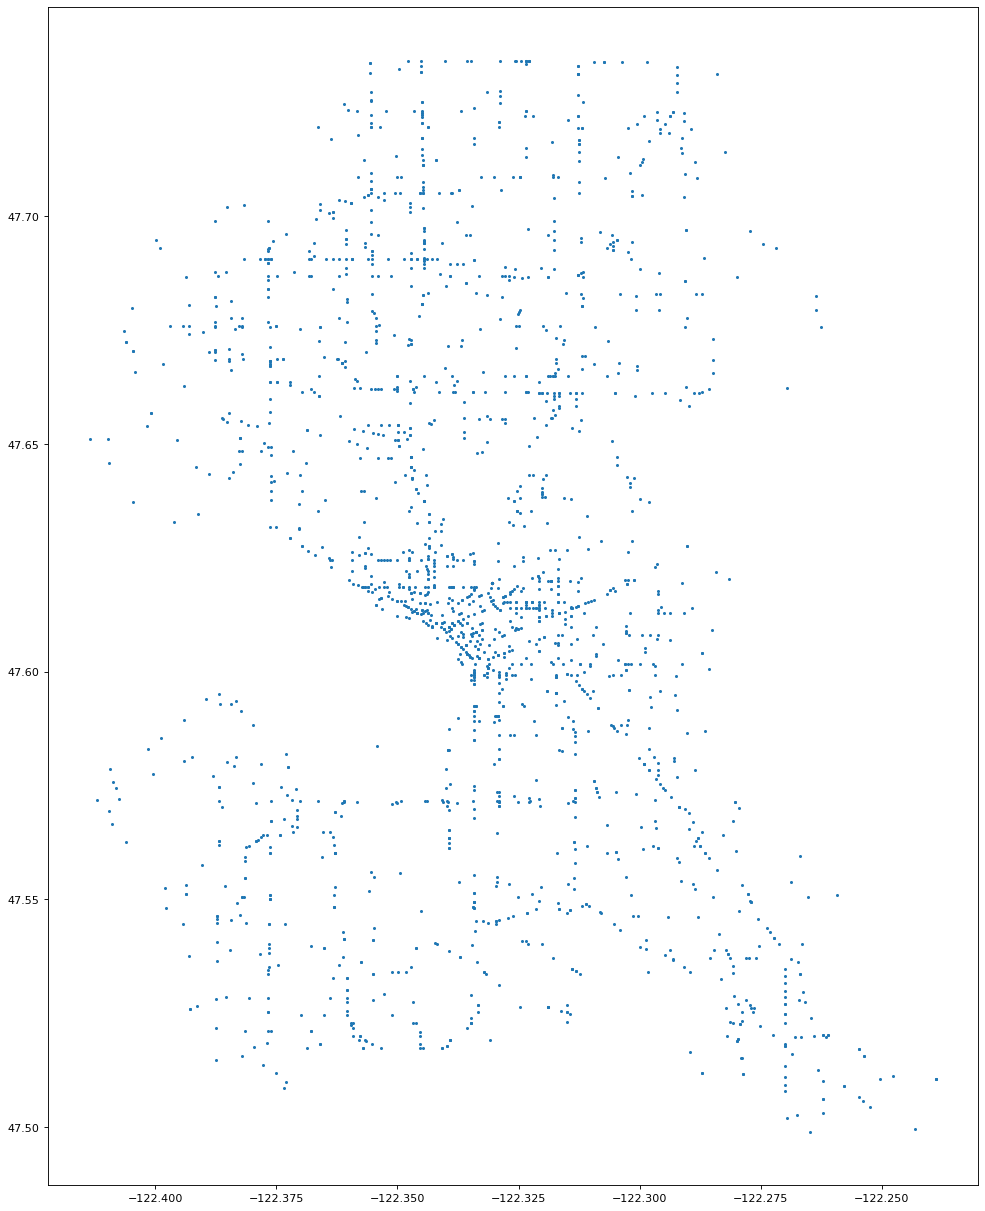

In [61]:
S = TrainPEDNUM
# Plot the points with colors
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(S['X'], S['Y'], s = 3)

In [62]:
X_train.head()

,X,Y,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HOURDAY,DAYWEEK,MONTH,PEDNUM,...,WEATHER_Overcast,WEATHER_Raining,ROADCOND_Dry,ROADCOND_Ice-Snow-Slush,ROADCOND_Other,ROADCOND_Wet,LIGHTCOND_Dark,LIGHTCOND_Daylight,LIGHTCOND_Dusk-Dawn,LIGHTCOND_Other
112031,-122.355434,47.620936,0,0,0,0,0.608696,0.666667,0.666667,0,...,0,0,1,0,0,0,0,1,0,0
134420,-122.331077,47.623121,0,0,0,0,0.782609,0.333333,0.833333,0,...,0,0,1,0,0,0,0,1,0,0
69262,-122.329678,47.599198,0,0,0,0,0.652174,0.500000,0.416667,0,...,0,0,1,0,0,0,0,1,0,0
15648,-122.352907,47.517347,0,0,0,0,0.695652,0.500000,0.416667,0,...,0,1,0,0,0,1,0,1,0,0
103813,-122.335228,47.606104,0,0,0,0,0.782609,0.500000,0.416667,0,...,1,0,1,0,0,0,0,1,0,0


In [63]:
X_other.head()

,X,Y,HOURDAY,DAYWEEK,MONTH,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,ADDRTYPE_Unknown,JUNCTIONTYPE_At Intersection (but not related to intersection),...,ROADCOND_Wet,LIGHTCOND_Dark,LIGHTCOND_Daylight,LIGHTCOND_Dusk-Dawn,LIGHTCOND_Other,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,PEDNUM
69852,-122.381651,47.552036,0.695652,0.000000,0.833333,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
127886,-122.293643,47.721985,0.260870,0.833333,0.250000,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
56522,-122.382523,47.574379,0.000000,0.500000,0.583333,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
154670,-122.373587,47.650346,0.739130,0.666667,0.333333,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
12533,-122.296318,47.623065,0.956522,1.000000,0.666667,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [65]:
X_other = X_other.reindex(columns = X_train.columns)
X_other.head()

,X,Y,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HOURDAY,DAYWEEK,MONTH,PEDNUM,...,WEATHER_Overcast,WEATHER_Raining,ROADCOND_Dry,ROADCOND_Ice-Snow-Slush,ROADCOND_Other,ROADCOND_Wet,LIGHTCOND_Dark,LIGHTCOND_Daylight,LIGHTCOND_Dusk-Dawn,LIGHTCOND_Other
69852,-122.381651,47.552036,0,0,0,0,0.695652,0.000000,0.833333,0,...,0,0,1,0,0,0,0,1,0,0
127886,-122.293643,47.721985,0,0,0,0,0.260870,0.833333,0.250000,0,...,0,0,1,0,0,0,1,0,0,0
56522,-122.382523,47.574379,0,0,0,0,0.000000,0.500000,0.583333,0,...,0,0,1,0,0,0,0,0,1,0
154670,-122.373587,47.650346,0,0,0,0,0.739130,0.666667,0.333333,0,...,0,0,1,0,0,0,0,1,0,0
12533,-122.296318,47.623065,1,0,1,0,0.956522,1.000000,0.666667,0,...,0,0,1,0,0,0,1,0,0,0


In [66]:
X_cv, X_test, y_cv, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=5)

In [68]:
X_test.head()

,X,Y,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HOURDAY,DAYWEEK,MONTH,PEDNUM,...,WEATHER_Overcast,WEATHER_Raining,ROADCOND_Dry,ROADCOND_Ice-Snow-Slush,ROADCOND_Other,ROADCOND_Wet,LIGHTCOND_Dark,LIGHTCOND_Daylight,LIGHTCOND_Dusk-Dawn,LIGHTCOND_Other
168536,-122.336726,47.539733,1,0,0,0,0.565217,0.166667,0.500000,0,...,0,0,1,0,0,0,0,1,0,0
107422,-122.306357,47.599255,0,0,0,0,0.869565,0.666667,0.500000,0,...,1,0,1,0,0,0,0,0,1,0
133030,-122.343262,47.611453,1,0,1,0,0.347826,0.333333,0.583333,0,...,0,0,1,0,0,0,0,1,0,0
48726,-122.283044,47.664689,0,0,0,0,0.304348,0.666667,0.166667,0,...,0,0,1,0,0,0,0,1,0,0
3672,-122.376323,47.551052,1,0,0,0,0.913043,0.500000,0.333333,0,...,0,0,1,0,0,0,1,0,0,0
